<a href="https://colab.research.google.com/github/Shunl1996/CIS520/blob/hw1/CIS520hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 (Coding)

**Due Monday 21st September, 11:59pm**

**Submit the hw1.ipynb file to gradescope.**

To download the .ipynb version go to File->Download as .ipynb


Retain the outputs generated by the cells when you upload the notebook.


If you are working in pairs make sure to add your team member’s name on Gradescope when submitting

In [ ]:
"""
Import libraries that you might require
"""

import numpy as np
import math
import matplotlib.pyplot as plt
import operator
import pandas as pd
import io
import requests
from sklearn.metrics import accuracy_score

# Load Dataset

In [ ]:
url="https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv"
response = requests.get(url).content
diabetes = pd.read_csv(io.StringIO(response.decode('utf-8')))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Split the data into training, validation and testing sets

from sklearn.model_selection import train_test_split

data = diabetes.to_numpy()
X, y = data[:, :-1], data[:, -1]

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state=66)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.4, random_state=66)

# Question 4: KNN Classification

We will implement the KNN algorithm for the diabetes dataset. Refer to the pdf and the following functions for the instructions. Complete all the functions as indicated below. 

In [ ]:
"""
Task 1: Classification

Please implement KNN for K: 3, 5, and 7 
with the following norms:
L1
L2
L-inf

"""

def distanceFunc(metric_type, vec1, vec2):
    """
    Computes the distance between two d-dim vectors
    Args:
        metric_type: String
        vec1 (numpy vector): Vector
        vec2 (numpy vector): Vector
    Returns:
        distance (float): distance between the two vectors
    """

    diff = vec1 - vec2
    if metric_type == "L1":
        #complete
        distance = np.sum(np.abs(diff))

    if metric_type == "L2":
        #complete
        distance = np.sqrt(np.sum(np.power(diff,2)))

    if metric_type == "L-inf":
        #complete
        distance = np.max(np.abs(diff))

    return distance


def computeDistancesNeighbors(K, metric_type, X_train, y_train, sample):
    """
    Compute the distances between every datapoint in the train_data and the 
    given sample. Then, find the k-nearest neighbors.
    Return a numpy array of the label of the k-nearest neighbors.
    
    Args:
        K (int): K-value
        metric_type (String): metric type
        X_train (numpy array): Training data
        y_train : Training labels
        sample (numpy vector): Sample whose distance is to computed with every entry in the dataset
        
    Returns:
        neighbors (list): K-nearest neighbors' labels
    """

    # You will also call the function "distanceFunc" here
    # Complete this function
    neighbors = []
    distances = []
    for x in X_train :
      distance = distanceFunc(metric_type, x, sample)
      distances.append(distance)

    nn = np.argsort(distances)
    knn = nn[0:K]

    for idx in knn :
      neighbors.append(y_train[idx])

    return neighbors


def Majority(neighbors):
    """
    Performs majority voting and returns the predicted value for the test sample
    Args:
        neighbors (list): K-nearest neighbors' labels
    Returns:
        predicted_value (int or float): predicted label for the given sample
    """
    
    # Performs majority voting
    # Complete this function
    j = np.mean(neighbors)
    if j >= 0.5 :
      predicted_value = 1
    else:
      predicted_value = 0 
    
    return predicted_value


def KNN(K, metric_type, X_train, y_train, X_val):
    """
    Returns the predicted values for the entire validation or test set
    Args:
        K (int): K-value
        metric_type (String): metric type
        X_train (numpy array): Training data
        y_train : Training labels
        X_val or X_test (numpy array): Validation or test data
    Returns:
        predicted_values (list): output for every entry in validation/test dataset 
    """
    
    # Complete this function
    # Loop through the val_data or the test_data (as required)
    # and compute the output for every entry in that dataset  
    # You will also call the function "Majority" here
    predictions = []
    for sample in X_val:
      neighbors = computeDistancesNeighbors(K, metric_type, X_train, y_train, sample)
      predict = Majority(neighbors)
      predictions.append(predict)

    
        
    return predictions


def evaluation(predicted_values, actual_values):
    """
    Computes the accuracy of the given datapoints.
    
    Args:
        predicted_values: vector
        actual_values: numpy vector
    
    Returns:
        accuracy (float): accuracy
    """
    
    return accuracy_score(predicted_values, actual_values)


def main():
    """
    Calls the above functions in order to implement the KNN algorithm.
    
    Test over the following range K = 3,5,7 and all three metrics. 
    In total you will have nine combinations to try.
    
    PRINTS out the accuracies for the nine combinations on the validation set,
    and the accuracy on the test set for the selected K value and appropriate norm.
    """
    
    ## Complete this function
    
    K = [3,5,7]
    norm = ["L1", "L2", "L-inf"]
    best_K = 0
    best_norm = None
    val = 0.0
    print("<<<<VALIDATION DATA PREDICTIONS>>>>")
    for k in K:
      for n in norm:
        val_predicts = KNN(k, n, X_train, y_train, X_val)
        
        print("K = " + str(k) + ", norm = " + n)
        score = evaluation(val_predicts, y_val)        
        print(score)
        if score > val:
          best_K = k
          best_norm = n
          val = score

    ## Complete
    test_predicts = KNN(best_K, best_norm, X_train, y_train, X_test)
    print("<<<<TEST DATA PREDICTIONS>>>>")
    print("K_best = " + str(best_K) + ", norm_best = " + best_norm)
    print(evaluation(test_predicts, y_test))

    ## Complete
    

In [ ]:
# Finally, call the main function
main()

<<<<VALIDATION DATA PREDICTIONS>>>>
K = 3, norm = L1
0.7217391304347827
K = 3, norm = L2
0.6956521739130435
K = 3, norm = L-inf
0.7304347826086957
K = 5, norm = L1
0.7565217391304347
K = 5, norm = L2
0.7652173913043478
K = 5, norm = L-inf
0.7304347826086957
K = 7, norm = L1
0.7304347826086957
K = 7, norm = L2
0.7739130434782608
K = 7, norm = L-inf
0.7304347826086957
<<<<TEST DATA PREDICTIONS>>>>
K_best = 7, norm_best = L2
0.7142857142857143


In [ ]:
# # #Debug ssection
# a = distanceFunc("L-inf", np.array([1,2,1]), np.array([4,5,6]))
# print(a)
# kkk = 2
# m = 'L-inf'
# X_debug = np.array(([1,2,10],[3,3,20],[5,6,7]))
# y_debug = np.array([7,3,2])
# sample = np.array([9,5,8])
# a = computeDistancesNeighbors(kkk, m, X_debug, y_debug, sample)
# print(a)
# Majority([1,1,1,1,1,0,0,0,1,1,0])

# Question 5: Decision Tree Classification

### Helper functions
The block below contains helper functions for this task.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Below are a list of helper functions to use to help you on this task

def train_decision_tree(X, y, depth=None, leaf_count=None):
  """
  Trains a decision tree classifier on the given X, y data with the specified 
  tree depth d and max leaf node count max_leaf_num.
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix
    y ((n,) np.ndarray): The input ys, which are in an n length array
    depth (int): The maximum depth of the tree. A value of None means no restrictions
             on the depth of the tree.
    leaf_count (int): The maximum leaf count of the tree's leaf nodes. A value of None means 
    no restrictions on the leaf count of the tree.
  
  Returns:
    clf(DecisionTreeClassifier): the trained decision tree classifier
  """
  clf = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf_count, criterion="entropy", random_state=1)
  clf.fit(X,y)
  return clf

def predict(clf, X_test):
  """
  Uses a trained decision tree classifier to predict on a given test set.
  
  Args:
    clf (DecisionTreeClassifier): Trained Decision Tree Classifer
    X_test ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                               p (number of features) matrix
  
  Returns:
    y_pred ((n,) np.ndarray): The output predictions, which are in an n length array
  """
  y_pred = clf.predict(X_test)
  return y_pred

def evaluate(predicted_values, actual_values):
    """
    Computes the accuracy of the given datapoints.
    
    Args:
        predicted_values: numpy array
        actual_values: numpy array
    
    Returns:
        a floating point number representing the accuracy
    """
    from sklearn.metrics import accuracy_score
    return accuracy_score(predicted_values, actual_values)
  
def plot_line_graph(x_vals, y_vals_1, y_vals_2, y_vals_1_label, y_vals_2_label, x_axis_label, y_axis_label, title):
  """
  Plots a line graph of two lines of different values with common x-values
  
  Args:
    x_vals ((j,) list): Values to be displayed on horizontal axis, where j is number of values
    y_vals_1 ((j,) list): First set of values to be graphed on a line in respect to x_vals, where j is number of values
    y_vals_2 ((j,) list): Second set of values to be graphed on a line in respect to x_vals, where j is number of values
    y_vals_1_label (string): Label for first set of y values
    y_vals_2_label (string): Label for second set of y values
    x_axis_label (string): Label for x axis
    y_axis_label (string): Label for y axis
    title (string): Plot title
  """
  
  plt.plot(x_vals, y_vals_1, color='g', label=y_vals_1_label)
  plt.plot(x_vals, y_vals_2, color='orange', label=y_vals_2_label)
  plt.xlabel(x_axis_label)
  plt.ylabel(y_axis_label)
  plt.title(title)
  plt.legend(loc='upper right')
  plt.show()

### Compare Accuracy for full classification dataset as well as smaller classification dataset
We will be using the diabetes classification dataset. You are also given a smaller training dataset with the same data as the full dataset but with only half of the sample number. We will observe the performance changes when less data is available.

To start, uncomment the code below and run to create small dataset. 

In [ ]:
# We will also use the same diabetes classification dataset in Task 1.
# Let's create a smaller version of the training dataset using only half of the data available

train_sample_num_small = int(X_train.shape[0] / 2)
X_train_small, y_train_small = X_train[:train_sample_num_small], y_train[:train_sample_num_small]

### Base Metrics on Full and Partial Data
To start, you will be comparing the training and testing accuracies of both datasets given a vanilla decision tree.

Note: Make sure to create two separate classifiers for each dataset.

In [ ]:
def base_metrics(X_train, y_train, X_train_small, y_train_small, X_val, y_val, X_test, y_test):
  """
  Create a decision tree classifer on the full dataset and the partial dataset (only half of n).
    
  Args: (Note that n is not the same among train and test sets, but merely refers to sample size)
    X_train ((n,p) np.ndarray): Input feature matrix of full dataset for training/fitting
    y_train ((n,) np.ndarray): Input label array of full dataset for training/fitting
    X_train_small ((n,p) np.ndarray): Input feature matrix of partial/small dataset for training/fitting
    y_train_small ((n,) np.ndarray): Input label array of partial/small dataset for training/fitting
    X_val ((n,p) np.ndarray): Input feature matrix of full dataset for validation
    y_val ((n,) np.ndarray): Input label array of full dataset for validation
    X_test ((n,p) np.ndarray): Input feature matrix of full dataset for testing
    y_test ((n,) np.ndarray): Input label array of full dataset for testing    

  To observe:
    train_acc_full_set (float): Training accuracy using a model trained on the full dataset
    val_acc_full_set (float): Validation accuracy using a model trained on the full dataset
    test_acc_full_set (float): Test accuracy using a model trained on the full dataset
    train_acc_small_set (float): Training accuracy using a model trained on the small dataset
    val_acc_small_set (float): Validation accuracy using a model trained on the full dataset
    test_acc_small_set (float): Test accuracy using a model trained on the full dataset
  """
  
  # <---- Your code here ----->

  clf_full = train_decision_tree(X_train, y_train)
  clf_small = train_decision_tree(X_train_small, y_train_small)

  train_full = predict(clf_full, X_train)
  train_small = predict(clf_small, X_train_small)
  val_full = predict(clf_full, X_val)
  val_small = predict(clf_small, X_val)
  test_full = predict(clf_full, X_test)
  test_small = predict(clf_small, X_test)

  train_acc_full_set = evaluate(train_full, y_train)
  val_acc_full_set = evaluate(val_full, y_val)
  test_acc_full_set = evaluate(test_full, y_test)

  train_acc_small_set = evaluate(train_small, y_train_small)
  val_acc_small_set = evaluate(val_small, y_val)
  test_acc_small_set = evaluate(test_small, y_test)

  # <---- Your code here ----->
  
  print("Train Accuracy on Full Dataset: ", train_acc_full_set)
  print("Validation Accuracy on Full Dataset: ", val_acc_full_set)
  print("Test Accuracy on Full Dataset: ", test_acc_full_set)
  print("Train Accuracy on Small (Half) Dataset: ", train_acc_small_set)
  print("Validation Accuracy on Small (Half) Dataset: ", val_acc_small_set)
  print("Test Accuracy on Small (Half) Dataset: ", test_acc_small_set)
  
  return (train_acc_full_set, 
          val_acc_full_set, 
          test_acc_full_set,
          train_acc_small_set, 
          val_acc_small_set, 
          test_acc_small_set)

Uncomment the code below and run the code. 

In [ ]:
base_metrics(X_train, y_train, X_train_small, y_train_small, X_val, y_val, X_test, y_test)

Train Accuracy on Full Dataset:  1.0
Validation Accuracy on Full Dataset:  0.7043478260869566
Test Accuracy on Full Dataset:  0.7532467532467533
Train Accuracy on Small (Half) Dataset:  1.0
Validation Accuracy on Small (Half) Dataset:  0.7130434782608696
Test Accuracy on Small (Half) Dataset:  0.6753246753246753


(1.0,
 0.7043478260869566,
 0.7532467532467533,
 1.0,
 0.7130434782608696,
 0.6753246753246753)

### Question 5.1 Report on LaTeX
Answer the following questions on LaTeX in the respective section.
1. Report the results of the accuracies on LateX 
2. Which dataset had a higher difference between training and test accuracy? Briefly explain why.

### Improving Decision Tree for Smaller Dataset by Tuning Hyperparameters
Classifiers often overfit on smaller datasets, so now, we will optimize hyperparameters on tree depth and max leaf count to improve the performance of our model. 

Fill out the helper functions below which will take an array of hyperparameter values for tree depth and an array of hyperparameter values for max leaf count. The helper function will return a training and validation accuracy scores for each pair of hyperparameter values. This is referred to as grid search for hyperparameter tuning.

At the end, the function identifies the best value of the tree depth and tree node count hyperparameters for a dataset, as well as the final training and testing scores.

Note: Use the highest validation score to choose the optimal hyperparameter combination. If there is a tie, use the lower hyperparameter value.

In [ ]:
def grid_search_depth_and_leaf_count(depth_search_space, leaf_count_search_space, X_train, y_train, X_val, y_val):
  """
  Perform a decision tree hyperparameter grid search on tree depth and leaf count given training and validation data.
    
  Args:
    depth_search_space ((d,) list): Tree depth values to search over, i.e. [1, 3, 6, 10, 30]
    leaf_count_search_space ((l,) list): Max leaf count values to search over, i.e. [2, 3, 4, 5, 6]
    X_train ((n, p) np.ndarray): The input feature matrix for training
    y_train ((n, p) np.ndarray): The input ys for training
    X_val ((n, p) np.ndarray): The input feature matrix that will be used to validate accuracy scores
    y_val ((n, p) np.ndarray): The input ys that will be used to validate accuracy scores
    
  To return:
    best_depth (int): The depth count in the hyperparameter combination with the largest validation score
    best_leaf_count (int): The leaf count in the hyperparameter combination with the largest validation score
  """
  
  
  
  # <---- Your code here ----->
  best_depth, best_leaf_count = 0,0
  val = 0.0
  for tree_dep in depth_search_space:
    for leaf_coun in leaf_count_search_space:
      clf = train_decision_tree(X_train, y_train, depth= tree_dep, leaf_count= leaf_coun)
      score = evaluate(predict(clf, X_val), y_val)
      # print(tree_dep , leaf_coun, score )
      if score > val:
        best_depth = tree_dep
        best_leaf_count = leaf_coun
        val = score
  # <---- Your code here ----->
  print("Chosen Depth: ", best_depth)
  print("Chosen Leaf: ", best_leaf_count)
  
  return best_depth, best_leaf_count

Uncomment and run the code below to and record the best depth and best leaf count hyperparameters on LaTeX in the respective section.

In [ ]:
# # Search spaces for grid search to tune tree depth and leaf count hyperparameters
depth_search_space = [1, 3, 6, 10, 30]
leaf_count_search_space = [2, 3, 4, 5, 6]

print("FULL DATASET")
grid_search_depth_and_leaf_count(depth_search_space, 
                                 leaf_count_search_space, 
                                 X_train, 
                                 y_train, 
                                 X_val, 
                                 y_val)

print("\nSMALL DATASET")
grid_search_depth_and_leaf_count(depth_search_space, 
                                 leaf_count_search_space, 
                                 X_train_small, 
                                 y_train_small, 
                                 X_val,
                                 y_val)

FULL DATASET
Chosen Depth:  3
Chosen Leaf:  4

SMALL DATASET
Chosen Depth:  1
Chosen Leaf:  2


(1, 2)

### Question 5.2 Report on LaTeX
Answer the following questions on LaTeX in the respective section.
1. Report the chosen hyperparameters for both the complete set and the partial set.
2. Did the small dataset have higher or lower chosen hyperparameter values than the full dataset? Briefly explain why.

### Retrain Decision Tree and Plot Hyperparameter Search
Now retrain your decision tree with the optimal hyperparameters. Report training, validation, and testing error for the small dataset.

Also for the small dataset, create a graph plotting the training and validation scores for each leaf node hyperparameter value, holding the tree depth hyperparameter consistent at the chosen value.

In [ ]:
def retrain_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test):
  
  """
  Perform a decision tree hyperparameter grid search given training and validation data and search values for
  tree depth and leaf node count.
    
  Args: (Note that n is not the same among train and test sets, but merely refers to sample size)
    X_train ((n,p) np.ndarray)
    y_train ((n,) np.ndarray)
    X_val ((n,p) np.ndarray)
    y_val ((n,) np.ndarray)
    X_test ((n,p) np.ndarray)
    y_test ((n,) np.ndarray)

  To return:
    train_acc (float): Optimal Hyperparameters Train Accuracy
    val_acc (float): Optimal Hyperparameters Train Accuracy
    test_acc (float): Optimal Hyperparameters Train Accuracy
    
    leaf_count_train_scores (list): Report training scores for max leaf count search space
    leaf_count_val_scores (list): Report validation scores for max leaf count search space
  """
  # Select best hyperparameters
  depth_search_space = [2, 4, 6, 8, 10, 16, 20]
  leaf_count_search_space = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

  chosen_depth, chosen_leaf_count = grid_search_depth_and_leaf_count(depth_search_space, 
                                                                     leaf_count_search_space, 
                                                                     X_train, 
                                                                     y_train, 
                                                                     X_val, 
                                                                     y_val)
  
  # <---- Your code here ----->
  clf_opt = train_decision_tree(X_train, y_train, depth= chosen_depth, leaf_count= chosen_leaf_count)          
  train_acc = evaluate(predict(clf_opt, X_train), y_train)
  val_acc = evaluate(predict(clf_opt, X_val), y_val)
  test_acc = evaluate(predict(clf_opt, X_test), y_test)
  leaf_count_train_scores = []
  leaf_count_val_scores = []

  for leaf_count in leaf_count_search_space:
    clf = train_decision_tree(X_train, y_train, depth= chosen_depth, leaf_count= leaf_count)
    val = predict(clf, X_val)
    train = predict(clf, X_train)
    val_sc = evaluate(val, y_val).round(3)
    train_sc = evaluate(train, y_train).round(3)
    leaf_count_train_scores.append(train_sc)
    leaf_count_val_scores.append(val_sc)
  
  plot_line_graph(leaf_count_search_space, 
                  leaf_count_train_scores, 
                  leaf_count_val_scores, 
                  "leaf_count_train_scores", 
                  "leaf_count_val_scores", "leaf_count", "Scores", "training and validation scores for each leaf node hyperparameter value")
  # <---- Your code here ----->
  
  print("Optimal Hyperparameters Train Accuracy: ", train_acc)
  print("Optimal Hyperparameters Validation Accuracy: ", val_acc)
  print("Optimal Hyperparameters Test Accuracy: ", test_acc)
  
  print("Training Scores per Max Leaf Node Count:", leaf_count_train_scores)
  print("Validation Scores per Max Leaf Node Count:", leaf_count_val_scores)
  
  return (train_acc, val_acc, test_acc, leaf_count_train_scores, leaf_count_val_scores)

Run the code above for the small dataset and by uncommenting code below. Report all necessary values and both graphs on Latex.

Chosen Depth:  6
Chosen Leaf:  9


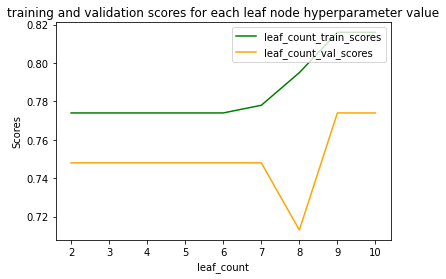

Optimal Hyperparameters Train Accuracy:  0.8159722222222222
Optimal Hyperparameters Validation Accuracy:  0.7739130434782608
Optimal Hyperparameters Test Accuracy:  0.7142857142857143
Training Scores per Max Leaf Node Count: [0.774, 0.774, 0.774, 0.774, 0.774, 0.778, 0.795, 0.816, 0.816]
Validation Scores per Max Leaf Node Count: [0.748, 0.748, 0.748, 0.748, 0.748, 0.748, 0.713, 0.774, 0.774]


(0.8159722222222222,
 0.7739130434782608,
 0.7142857142857143,
 [0.774, 0.774, 0.774, 0.774, 0.774, 0.778, 0.795, 0.816, 0.816],
 [0.748, 0.748, 0.748, 0.748, 0.748, 0.748, 0.713, 0.774, 0.774])

In [ ]:
retrain_decision_tree(X_train_small, y_train_small, X_val, y_val, X_test, y_test)

### Question 5.3 Report on LaTeX
Answer the following question on LaTeX in the respective section.
1. Report the values on LaTeX.
2. How did the training accuracy and testing accuracy change after tuning compared to before? Briefly explain why.
3. Paste the plot and explain any trends or patterns with the plot within validation and training scores and briefly explain why.

## Additional Exercise (Ungraded)

This section is ungraded. You can try it out for fun. sklearn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) used in this homework has a parameter called **min_samples_split**. Try playing around with it's values to see if you can get better accuracy for the X_train_small dataset. 

You don't need to add results of this section in your submission. It is for you to try out. 


# Question 6: Feature Scaling Effects on KNNs and DTs

### Observing effects of standardizing features

Up until now, we have not been using standardized features. Let's observe the effects of standardized features with decision trees and KNNs.

Standardization, or feature scaling / data normalization, is a common preprocessing step for data within machine learning. We will see why it's important.

Here is a definition taken from SK-Learn's website on Standardization:

*Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.*

*In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.*

Learn More: https://scikit-learn.org/stable/modules/preprocessing.html

To start, uncomment the code below and run to retrieve the data. (Recomment before submission.)

In [ ]:
# We will use the same data as the previous tasks
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Helper Functions
  
We implemented above the KNN algorithm. Sci-kit learn also has their own version of the KNN algorithm which we will use in this following task. Use the two helper functions below in this next task.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def train_KNN(X, y, norm=2, K=5):
  """
  Trains a KNN classifier on the given X, y data with the specified 
  norm and K.
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix
    y ((n,) np.ndarray): The input ys, which are in an n length array
    norm (int): The number form of the norm. Note that sklearn only allows L1 and L2 norms,
                (norm would be 1 and 2 respectively). Default is 2.
    K (int): The value of K for the KNN algorithm. Default is 5.
  
  Returns:
    clf(KNeighborsClassifier): the trained KNN model
  """
  
  clf = KNeighborsClassifier(n_neighbors=K, p=norm)
  clf.fit(X,y)
  return clf

def train_decision_tree(X, y, depth=None, leaf_count=None):
  """
  This helper function is defined again from a previous section. 
  
  Trains a decision tree classifier on the given X, y data with the specified 
  tree depth d and max leaf node count max_leaf_num.
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix
    y ((n,) np.ndarray): The input ys, which are in an n length array
    depth (int): The maximum depth of the tree. A value of None means no restrictions
             on the depth of the tree.
    leaf_count (int): The maximum leaf count of the tree's leaf nodes. A value of None means 
    no restrictions on the leaf count of the tree.
  
  Returns:
    clf(DecisionTreeClassifier): the trained decision tree
  """
  clf = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf_count, criterion="entropy", random_state=1)
  clf.fit(X,y)
  return clf

def predict(clf, X_test):
  """
  This helper function is defined again from a previous section. 
  
  Uses a trained model to predict on a given test set.
  
  Args:
    clf (Classifier): Trained classifier such as KNN or Decision Tree
    X_test ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                               p (number of features) matrix
  
  Returns:
    y_pred ((n,) np.ndarray): The output predictions, which are in an n length array
  """
  y_pred = clf.predict(X_test)
  return y_pred

def evaluate(predicted_values, actual_values):
    """
    This helper function is defined again from a previous section. 
    
    Computes the accuracy of the given datapoints.
    
    Args:
        predicted_values: numpy array
        actual_values: numpy array
    
    Returns:
        a floating point number representing the accuracy
    """
    return accuracy_score(predicted_values, actual_values)

### Retrieving Metrics for Unstandardized Data
Fill out this function to retrieve training and test accuracies for both KNN and decision tree models. Use default hyperparameters.

In [ ]:
def get_classifier_metrics(X_train, y_train, X_test, y_test):
  """
  Create a decision tree and KNN classifer on the normal dataset.
    
  Args: (Note that n is not the same among train and test sets, 
         but merely refers to sample size)
    X_train ((n,p) np.ndarray)
    y_train ((n,) np.ndarray)
    X_test ((n,p) np.ndarray)
    y_test ((n,) np.ndarray)

  To return:
    knn_train_accuracy (float): Accuracy of KNN for train set
    knn_test_accuracy (float): Accuracy of KNN for test set
    dt_train_accuracy (float): Accuracy of DT for train set
    dt_test_accuracy (float): Accuracy of DT for test set    
  """
  
  # <---- Your code here ----->
  clf_knn = train_KNN(X_train, y_train)
  clf_dt = train_decision_tree(X_train, y_train)
  
  knn_train_accuracy = evaluate(predict(clf_knn, X_train), y_train)
  dt_train_accuracy = evaluate(predict(clf_dt, X_train), y_train)

  knn_test_accuracy = evaluate(predict(clf_knn, X_test), y_test)
  dt_test_accuracy = evaluate(predict(clf_dt, X_test), y_test)
  # <---- Your code here ----->
  
  print("knn_train_accuracy: ", knn_train_accuracy)
  print("knn_test_accuracy: ", knn_test_accuracy)
  print("dt_train_accuracy: ", dt_train_accuracy)
  print("dt_test_accuracy: ", dt_test_accuracy)
  
  return knn_train_accuracy, knn_test_accuracy, dt_train_accuracy, dt_test_accuracy

Uncomment the code below and run the code.

In [ ]:
print("FOR UNSTANDARDIZED DATA")
get_classifier_metrics(X_train, y_train, X_test, y_test)

print("\nFOR STANDARDIZED DATA")
get_classifier_metrics(X_train_scaled, y_train, X_test_scaled, y_test)

FOR UNSTANDARDIZED DATA
knn_train_accuracy:  0.7899305555555556
knn_test_accuracy:  0.7012987012987013
dt_train_accuracy:  1.0
dt_test_accuracy:  0.7532467532467533

FOR STANDARDIZED DATA
knn_train_accuracy:  0.8177083333333334
knn_test_accuracy:  0.8181818181818182
dt_train_accuracy:  1.0
dt_test_accuracy:  0.7532467532467533


(0.8177083333333334, 0.8181818181818182, 1.0, 0.7532467532467533)

### Question 6 Report on LaTex
Answer the following question on LaTeX in the respective section.
1. Report the values on LaTeX.
2. What happens to performance when we use standardization for data with decision trees? What about KNN? Briefly explain why each happened.

# Submission

**Due Monday 21st September, 11:59pm**

**Submit the hw1.ipynb file to gradescope.**

To download the .ipynb version go to File->Download as .ipynb


Retain the outputs generated by the cells when you upload the notebook.


If you are working in pairs make sure to add your team member’s name on Gradescope when submitting
